In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns


In [112]:
data = pd.read_csv('../Shrusti/final_data.csv')
data.head()

,Unnamed: 0,X.x,pit_id,height,site_name,latitude,longitude,date,grain_size,density,temperature,b,zeta,X.y,y
0,1,1,COGM1C1_20200131,83,Grand Mesa,39.064180,-108.220220,2020-01-31,1.375000,249.388889,-5.710000,1.696404,11150.574983,97,0.058522
1,2,2,COGM1C1_20200208,77,Grand Mesa,39.064288,-108.220239,2020-02-08,1.571429,289.187500,-4.822222,1.910956,9785.457574,25,0.058522
2,3,3,COGM1C14_20200131,81,Grand Mesa,39.047216,-108.198415,2020-01-31,2.150000,263.142857,-5.488889,1.966635,7201.657904,112,0.036172
3,4,4,COGM1C5_20200212,75,Grand Mesa,39.061879,-108.215561,2020-02-12,1.416667,302.833333,-6.577778,1.922928,10829.727148,53,0.019296
4,5,5,COGM1C7_20200131,96,Grand Mesa,39.058674,-108.210383,2020-01-31,1.750000,277.833333,-5.990909,1.914804,8807.772524,7,0.023656


In [107]:
df = data[['height','grain_size', 'density', 'temperature', 'y']]
df.columns

Index(['height', 'grain_size', 'density', 'temperature', 'y'], dtype='object')

In [108]:
df.columns = ['height', 'grain_size', 'density', 'temperature', 'amplitude']

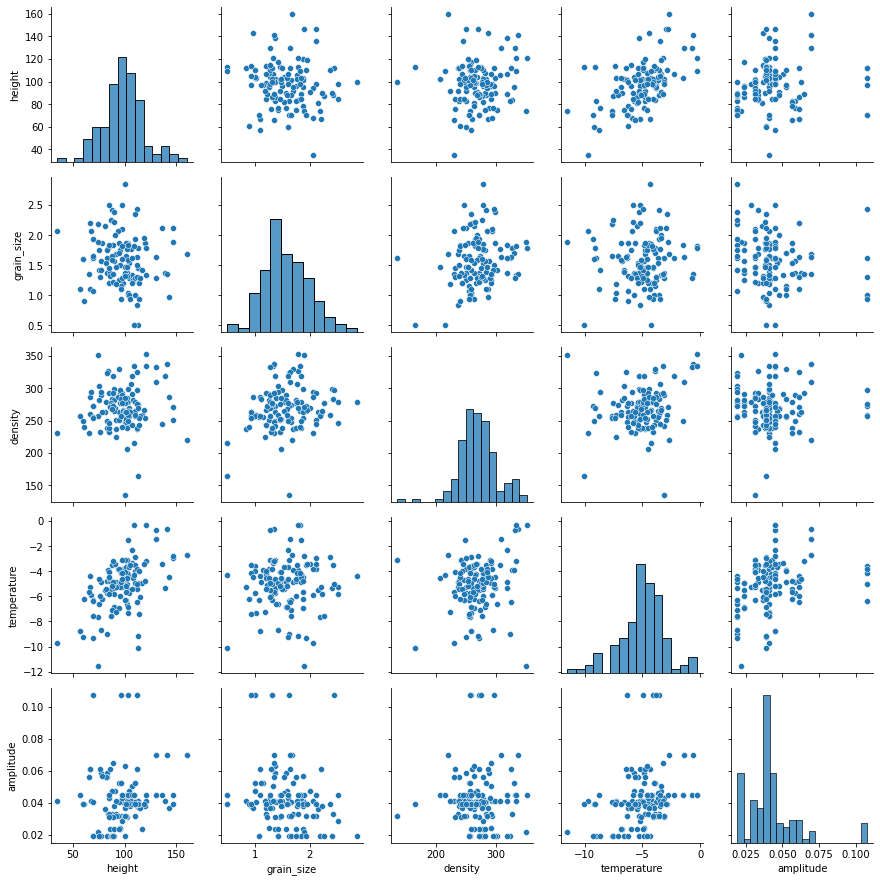

In [14]:
#calculate SWE 
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)


In [15]:
len(data)

125

In [16]:
outliers = data[data.y > 0.1]
outliers

,Unnamed: 0,X.x,pit_id,height,site_name,latitude,longitude,date,grain_size,density,temperature,b,zeta,X.y,y
39,40,40,COGM2S25_20200129,103,Grand Mesa,39.016246,-108.168366,2020-01-29,1.000000,258.283333,-3.591667,1.628193,15225.000000,89,0.107466
40,41,41,COGM2S27_20200204,70,Grand Mesa,39.017958,-108.167258,2020-02-04,1.625000,272.500000,-6.362500,1.858689,9469.841498,40,0.107466
72,74,74,COGM5S24_20200129,97,Grand Mesa,39.018263,-108.169071,2020-01-29,0.928571,257.222222,-4.127273,1.604118,16369.443740,106,0.107466
74,76,76,COGM5S31_20200130,112,Grand Mesa,39.019466,-108.164807,2020-01-30,1.305556,275.875000,-3.784615,1.783683,11730.308717,2,0.107466
85,87,87,COGM6S26_20200212,112,Grand Mesa,39.018401,-108.167333,2020-02-12,2.437500,296.833333,-4.992308,2.181871,6369.795045,46,0.107466


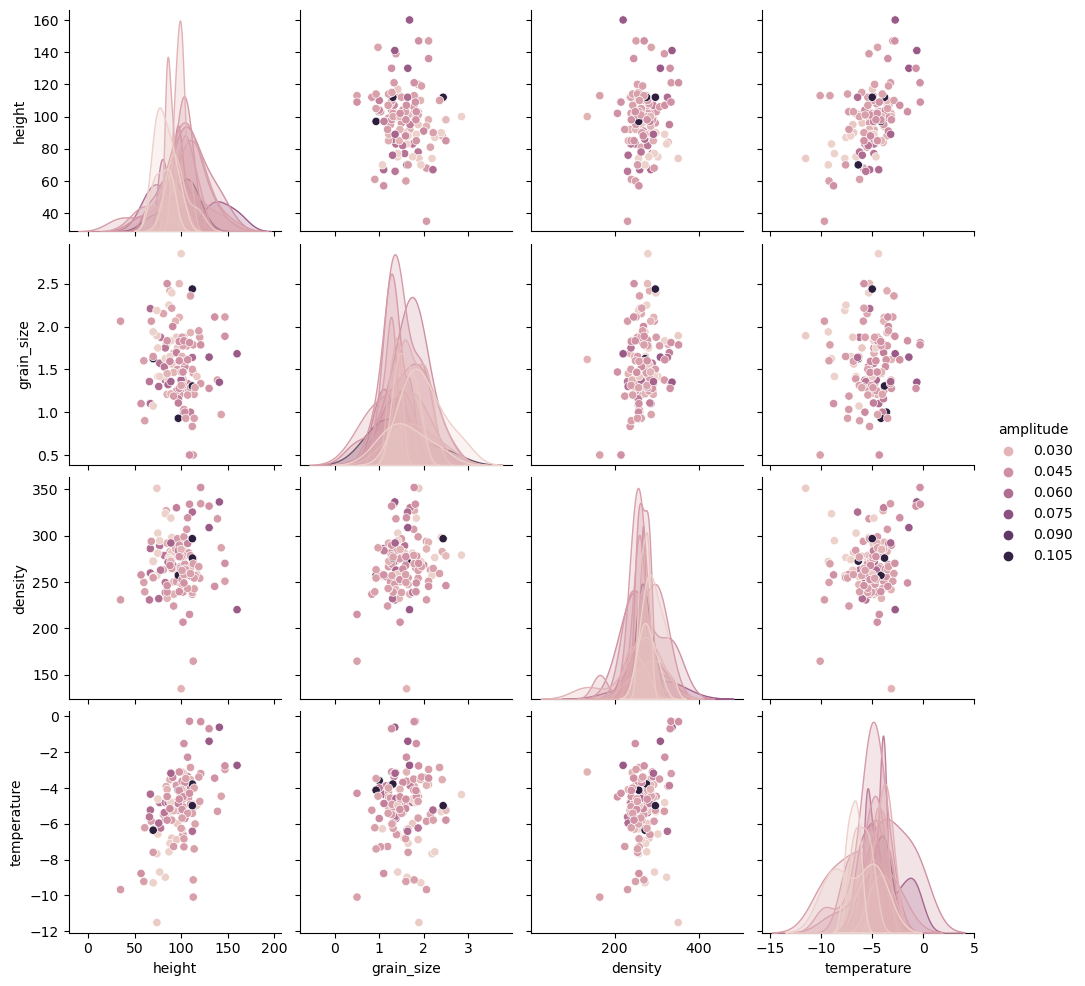

In [36]:
# pairplot with hue
sns.pairplot(df, hue ='amplitude')
plt.show()

## Comparing Polarizations

In [113]:
pits = data[['pit_id', 'height','grain_size', 'density', 'temperature', 'y']]
pits.columns = ['pit_id', 'height','grain_size', 'density', 'temperature', 'all_amplitude']




In [114]:
#reading in amplitudes for each polarization
HH = pd.read_csv('../Anuhya/amplitudes_HH.csv')
VV = pd.read_csv('../Anuhya/amplitudes_VV.csv')
VH = pd.read_csv('../Anuhya/amplitudes_VH.csv')
HV = pd.read_csv('../Anuhya/amplitudes_HV.csv')

In [115]:
#join in each polarization to the pits
#HH 
HH = HH[['0', '1']]
HH.columns = ['pit_id', 'HH_amp']
pits = pits.merge(HH, on=['pit_id'], how='left')


#VV
VV = VV[['0', '1']]
VV.columns = ['pit_id', 'VV_amp']
pits = pits.merge(VV, on=['pit_id'], how='left')


#HV
HV = HV[['0', '1']]
HV.columns = ['pit_id', 'HV_amp']
pits = pits.merge(HV, on=['pit_id'], how='left')


#VH
VH = VH[['0', '1']]
VH.columns = ['pit_id', 'VH_amp']
pits = pits.merge(VH, on=['pit_id'], how='left')

In [116]:
pits.head()

,pit_id,height,grain_size,density,temperature,all_amplitude,HH_amp,VV_amp,HV_amp,VH_amp
0,COGM1C1_20200131,83,1.375000,249.388889,-5.710000,0.058522,0.107583,0.107583,0.107583,0.107583
1,COGM1C1_20200208,77,1.571429,289.187500,-4.822222,0.058522,0.107583,0.107583,0.107583,0.107583
2,COGM1C14_20200131,81,2.150000,263.142857,-5.488889,0.036172,0.142749,0.142749,0.142749,0.142749
3,COGM1C5_20200212,75,1.416667,302.833333,-6.577778,0.019296,0.083195,0.083195,0.083195,0.083195
4,COGM1C7_20200131,96,1.750000,277.833333,-5.990909,0.023656,0.100066,0.100066,0.100066,0.100066


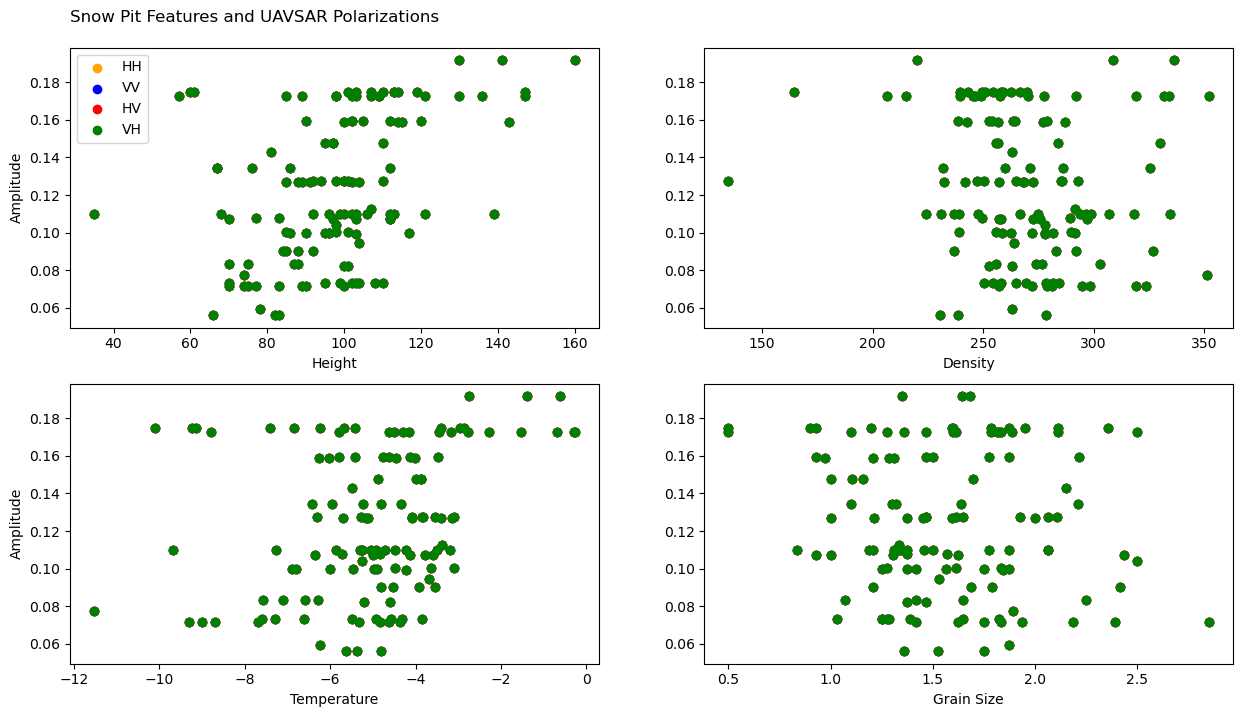

In [98]:
fig, axis = plt.subplots(2, 2)
fig.set_size_inches(15, 8)

#height
axis[0, 0].scatter(pits.height, pits.HH_amp, color = 'orange', label = 'HH')
axis[0, 0].scatter(pits.height, pits.VV_amp, color = 'blue', label = 'VV')
axis[0, 0].scatter(pits.height, pits.HV_amp, color = 'red', label = 'HV')
axis[0, 0].scatter(pits.height, pits.VH_amp, color = 'green', label = 'VH')
axis[0, 0].set_xlabel('Height')
axis[0, 0].set_ylabel('Amplitude')

#temperature
axis[1, 0].scatter(pits.temperature, pits.HH_amp, color = 'orange', label = 'HH')
axis[1, 0].scatter(pits.temperature, pits.VV_amp, color = 'blue', label = 'VV')
axis[1, 0].scatter(pits.temperature, pits.HV_amp, color = 'red', label = 'HV')
axis[1, 0].scatter(pits.temperature, pits.VH_amp, color = 'green', label = 'VH')
axis[1, 0].set_xlabel('Temperature')
axis[1, 0].set_ylabel('Amplitude')

#density
axis[0, 1].scatter(pits.density, pits.HH_amp, color = 'orange', label = 'HH')
axis[0, 1].scatter(pits.density, pits.VV_amp, color = 'blue', label = 'VV')
axis[0, 1].scatter(pits.density, pits.HV_amp, color = 'red', label = 'HV')
axis[0, 1].scatter(pits.density, pits.VH_amp, color = 'green', label = 'VH')
axis[0, 1].set_xlabel('Density')
#axis[0, 1].set_ylabel('Amplitude')

#grain_size
axis[1, 1].scatter(pits.grain_size, pits.HH_amp, color = 'orange', label = 'HH')
axis[1, 1].scatter(pits.grain_size, pits.VV_amp, color = 'blue', label = 'VV')
axis[1, 1].scatter(pits.grain_size, pits.HV_amp, color = 'red', label = 'HV')
axis[1, 1].scatter(pits.grain_size, pits.VH_amp, color = 'green', label = 'VH')
axis[1, 1].set_xlabel('Grain Size')
#axis[1, 1].set_ylabel('Amplitude')


axis[0, 0].set_title('Snow Pit Features and UAVSAR Polarizations\n', loc = 'left')
axis[0, 0].legend(loc = 'upper left')
plt.show()

,pit_id,height,grain_size,density,temperature,HH_amp,VV_amp,HV_amp,VH_amp
0,COGM1C1_20200131,83,1.375000,249.388889,-5.710000,0.107583,0.107583,0.107583,0.107583
1,COGM1C1_20200208,77,1.571429,289.187500,-4.822222,0.107583,0.107583,0.107583,0.107583
2,COGM1C14_20200131,81,2.150000,263.142857,-5.488889,0.142749,0.142749,0.142749,0.142749
3,COGM1C5_20200212,75,1.416667,302.833333,-6.577778,0.083195,0.083195,0.083195,0.083195
4,COGM1C7_20200131,96,1.750000,277.833333,-5.990909,0.100066,0.100066,0.100066,0.100066
...,...,...,...,...,...,...,...,...,...
120,COGMSO_20200406_1600,141,1.350000,336.511111,-0.611765,0.191472,0.191472,0.191472,0.191472
121,COGMSO_20200419_1600,130,1.277778,332.000000,-0.692857,0.172763,0.172763,0.172763,0.172763
122,COGMSO_20200421_0553,107,1.611111,319.378788,-2.284615,0.172763,0.172763,0.172763,0.172763
123,COGMSO_20200421_1626,109,1.812500,334.066667,-0.275000,0.172763,0.172763,0.172763,0.172763


# Plotting SWE

In [102]:
SWE = pd.read_csv('../Jonas/Pits_with_SWE_Height.csv')

In [103]:
SWE = SWE[['pit_id', 'SWEfin']]
SWE.columns = ['pit_id', 'SWE']
SWE.head()

,pit_id,SWE
0,COGM1N20_20200205,70.000000
1,COGM1N23_20200211,229.440868
2,COGM1S1_20200129,192.863339
3,COGM1S12_20200211,229.440868
4,COGM1S13_20200205,239.416558
